<a href="https://colab.research.google.com/github/ulubeykhuja/Amaliyot/blob/main/diabet_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# https://praktikum.mohirdev.uz/dashboard/practicums/62753e60919a3a1c62541aec/68e90743068aba3960cd674d/68e90743068aba3960cd678e

In [ ]:
csv = '''
BMI, Qon shakari, Diabet
22, 85, 0(Sog'lom)
30, 110, 1(Xavf ostida)
25, 95, 0(Sog'lom)
33, 120, 1(Xavf ostida)
'''

In [ ]:
import pandas as pd
from io import StringIO

df = pd.read_csv(StringIO(csv))
df

,BMI,Qon shakari,Diabet
0,22,85,0(Sog'lom)
1,30,110,1(Xavf ostida)
2,25,95,0(Sog'lom)
3,33,120,1(Xavf ostida)


In [ ]:
# ma'lumotlarni yig'ish va tensorga o'tkazish
X = torch.tensor([[0.2, 0.3], # malumotni standartlashtirdik
                  [0.6, 0.8],
                  [0.4, 0.5],
                  [0.7, 0.9]],
                  dtype=torch.float32
                 )
y = torch.tensor([[0], [1], [0], [1]], dtype=torch.float32)

In [ ]:
# modelni qurish
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

In [ ]:
# yo'qotish func
loss = nn.BCELoss()
#optimayzer
optimayzer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []

for epoch in range(epochs):
    y_pred = model(X)
    los_value = loss(y_pred, y)
    losses.append(los_value.item())

    optimayzer.zero_grad()
    los_value.backward()
    optimayzer.step()

    if epoch % 10 == 0:
      print(f'Epoch: {epoch}, Loss: {los_value.item()}')

Epoch: 0, Loss: 0.003526123473420739
Epoch: 10, Loss: 0.0024233991280198097
Epoch: 20, Loss: 0.001689315540716052
Epoch: 30, Loss: 0.0012225585523992777
Epoch: 40, Loss: 0.0009212123695760965
Epoch: 50, Loss: 0.000721495773177594
Epoch: 60, Loss: 0.0005832358147017658
Epoch: 70, Loss: 0.00048357638297602534
Epoch: 80, Loss: 0.00040901225293055177
Epoch: 90, Loss: 0.0003518005833029747


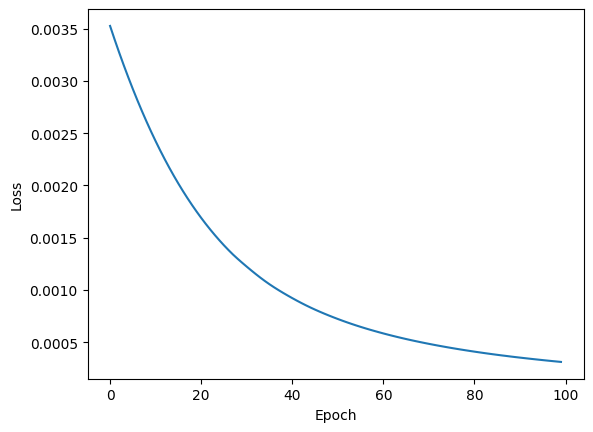

In [ ]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
yangi_bemor = torch.tensor([[0.55, 0.75]], dtype=torch.float32)
y_pred = model(yangi_bemor)
print(y_pred.item())

0.9904922842979431


In [ ]:
#Yangi bemorning diabetga chalinish ehtimoli 99% ni tashkil etadi